# Ch.5 Regression

### 5.4 보스턴 주택 가격 예측

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from scipy import stats
from sklearn.datasets import load_boston

boston = load_boston()

In [4]:
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)
bostonDF['PRICE'] = boston.target
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
bostonDF.shape

(506, 14)

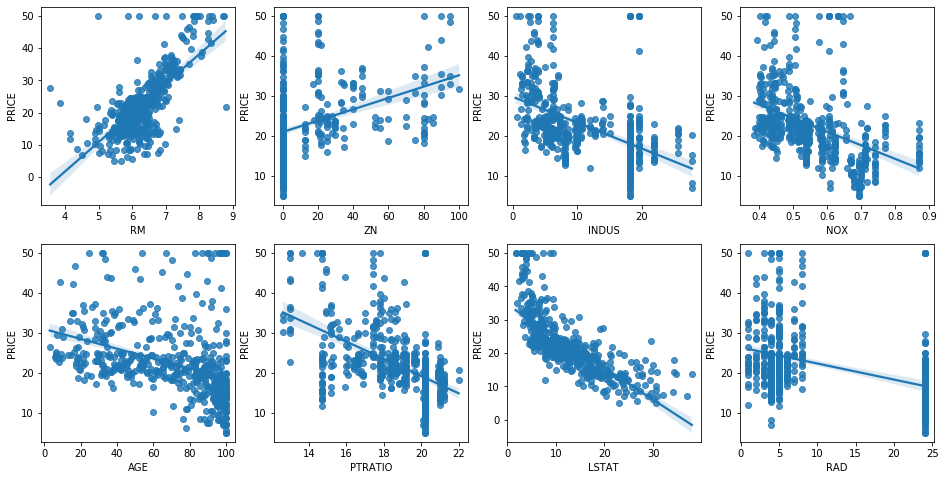

In [6]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의  regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

In [7]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [8]:
bostonDF.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### 단일 변수에 대한 선형 회귀

In [9]:
X = bostonDF['RM']
y = boston.target

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=0)

- 모델 불러와 객체 생성

In [11]:
from sklearn.linear_model import LinearRegression
sim_lr = LinearRegression()

- 모델 학습하기

In [12]:
sim_lr.fit(X_train.values.reshape(-1,1),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- 결과 예측하기

In [13]:
pred = sim_lr.predict(X_test.values.reshape(-1,1))

- 결과 확인하기

In [14]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)

0.42394386816456275

- 계수 w(weight), 절편 b(bias)

In [15]:
sim_lr.coef_, sim_lr.intercept_

(array([9.37638431]), -36.47618962764732)

- 도출한 회귀식 : PRICE = 9.38 * RM - 36.48

In [16]:
pred

array([22.90445223, 21.80741526, 23.2795076 , 13.67809006, 21.95743741,
       18.22563646, 18.89135974, 19.48207195, 10.15256956, 23.5795519 ,
       19.37893173, 25.94240075, 22.9794633 ,  7.1427502 , 36.67836079,
       29.54293232, 22.05120126, 31.84952286, 24.90162209, 18.37565861,
       23.77645597, 18.65695014, 20.97291706, 24.30153349, 16.80042604,
       -0.25521702, 19.4539428 , 17.05358842, 39.1818554 , 20.64474361,
       21.51674735, 20.54160338, 21.90117911, 20.67287276, 23.68269213,
       17.93496854, 19.66022326, 18.61006821, 23.04509799, 21.30109051,
       20.97291706, 17.77557001, 21.13231559, 14.40944804, 24.84536378,
       23.72957405, 17.81307555, 20.99166983,  9.49622266, 26.59874765,
       21.20732667, 16.68790943, 19.60396495, 40.96336842, 17.50365486,
       18.74133759, 17.02545926, 18.82572505, 17.50365486, 19.40706088,
       18.69445567, 20.84164768, 28.98972565, 24.95788039, 17.09109396,
       24.99538593, 25.92364798, 23.31701314, 27.77079569, 18.76

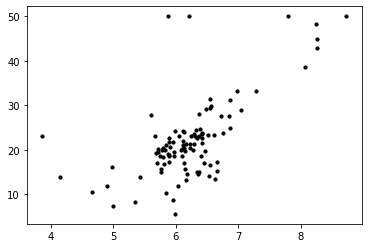

In [17]:
plt.scatter(X_test, y_test, s=10, c='black')
plt.show()

In [18]:
line_x = np.linspace(np.min(X_test), np.max(X_test),10)
line_y = sim_lr.predict(line_x.reshape(-1,1))

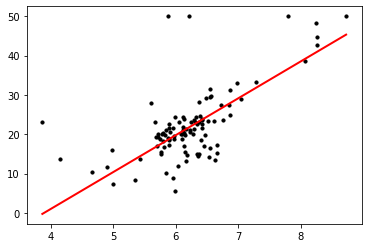

In [19]:
plt.scatter(X_test, y_test, s=10, c='black')
plt.plot(line_x,line_y, c='red', lw=2)
plt.show()

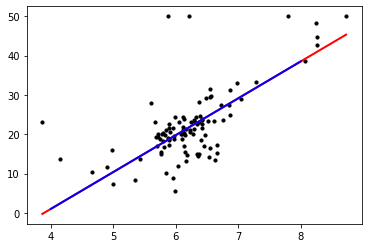

In [20]:
w = sim_lr.coef_[0]
b = sim_lr.intercept_
xs = np.array([4,8])
ys = xs * w + b

plt.scatter(X_test, y_test, s=10, c='black')
plt.plot(line_x,line_y, c='red', lw=2)
plt.plot(xs,ys, c='blue', lw=2)
plt.show()

### PRICE와 LSTAT

In [21]:
X = bostonDF['LSTAT']
y = boston.target

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=0)

In [23]:
from sklearn.linear_model import LinearRegression
sim_lr = LinearRegression()

In [24]:
sim_lr.fit(X_train.values.reshape(-1,1),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
pred = sim_lr.predict(X_test.values.reshape(-1,1))

In [26]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)

0.43095672846187616

In [27]:
sim_lr.coef_, sim_lr.intercept_

(array([-0.95648761]), 34.76519272372788)

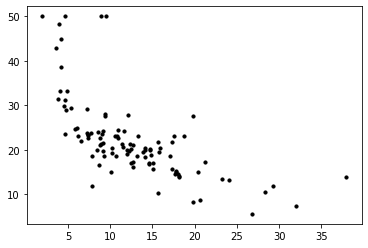

In [28]:
plt.scatter(X_test, y_test, s=10, c='black')
plt.show()

In [29]:
line_x = np.linspace(np.min(X_test), np.max(X_test),10)
line_y = sim_lr.predict(line_x.reshape(-1,1))

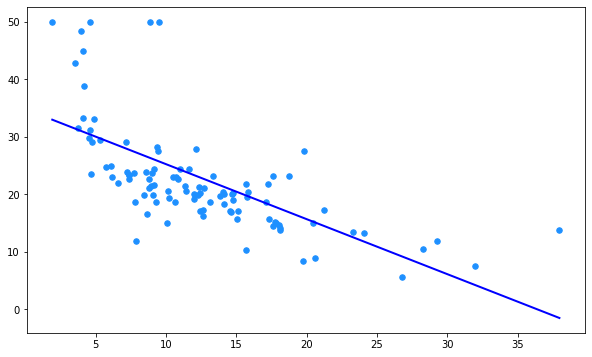

In [30]:
plt.rcParams["figure.figsize"] = (10,6)
plt.scatter(X_test, y_test, s=30, c='dodgerblue')
plt.plot(line_x,line_y, c='blue', lw=2)
plt.show()

In [31]:
X = []
line = []
line = bostonDF['LSTAT']
X.append(line)
line = []
line = bostonDF['RM']
X.append(line)
X[1]

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64

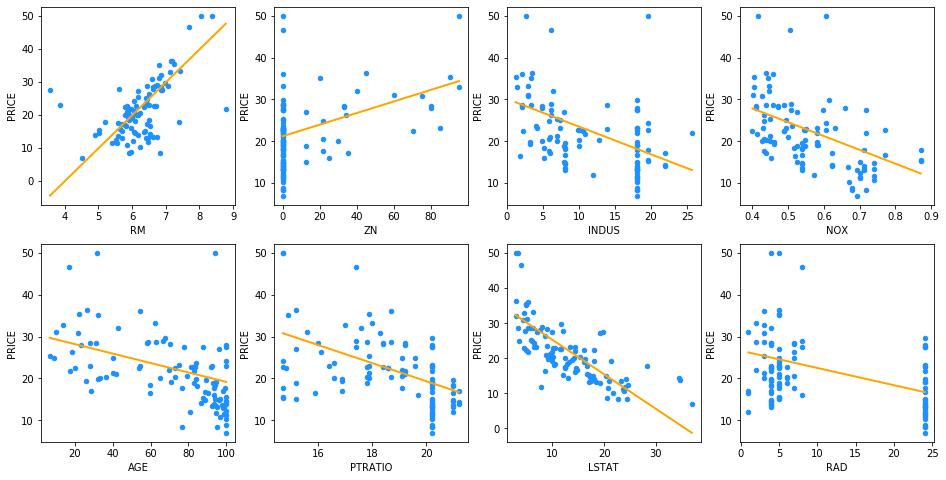

In [32]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
y = boston.target

for i, feature in enumerate(lm_features):
    X = bostonDF[feature]
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.2, random_state=2019)

    sim_lr = LinearRegression()
    sim_lr.fit(X_train.values.reshape(-1,1),y_train)
    
    line_x = np.linspace(np.min(X_test), np.max(X_test),10)
    line_y = sim_lr.predict(line_x.reshape(-1,1))
    
    row = int(i/4)
    col = i%4
    
    axs[row][col].scatter(X_test, y_test, s=20, c='dodgerblue')
    axs[row][col].plot(line_x,line_y, c='orange', lw=2)
    axs[row][col].set_xlabel(feature)
    axs[row][col].set_ylabel('PRICE')


In [33]:
import matplotlib as mpl
# MacOS 한글 설정
from matplotlib import rc
rc('font', family='AppleGothic')
mpl.rcParams['axes.unicode_minus'] = False   # minus 표시

from sklearn.metrics import mean_squared_error
def single_regression(X_train,X_test,y_train,y_test):
    slr = LinearRegression()
    slr.fit(X_train.values.reshape(-1,1),y_train)
    y_pred = slr.predict(X_test.values.reshape(-1,1))
    rmse = np.round(np.sqrt(mean_squared_error(y_test, y_pred)),2)
    return rmse, slr.coef_[0], slr.intercept_

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


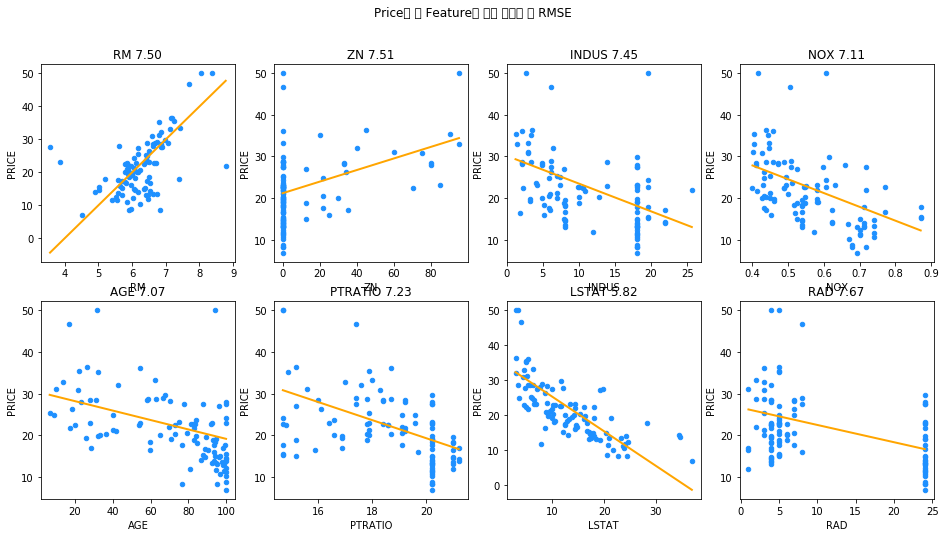

In [34]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
y = boston.target

for i, feature in enumerate(lm_features):
    X = bostonDF[feature]
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.2, random_state=2019)

    rmse, weight, bias = single_regression(X_train, X_test, y_train, y_test)
    
    line_x = np.array([np.min(X_test), np.max(X_test)])
    line_y = weight * line_x + bias
    
    row = int(i/4)
    col = i%4
    
    axs[row][col].scatter(X_test, y_test, s=20, c='dodgerblue')
    axs[row][col].plot(line_x,line_y, c='orange', lw=2)
    axs[row][col].set_xlabel(feature)
    axs[row][col].set_ylabel('PRICE')
    axs[row][col].set_title('%s %.2f'%(feature,rmse))
    
fig.suptitle("Price와 각 Feature에 대한 회귀선 및 RMSE")
plt.show()


In [35]:
from sklearn.linear_model import LinearRegression

lrs = LinearRegression()

X = bostonDF['LSTAT']
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2019)

lrs.fit(X_train.values.reshape(-1,1),y_train)
pred = lrs.predict(X_test.values.reshape(-1,1))
lrs_rmse = np.round(np.sqrt(mean_squared_error(y_test, pred)),2)

lrs_rmse

5.82

### Decision Tree Regressor

In [36]:
from sklearn.tree import DecisionTreeRegressor
dtc = DecisionTreeRegressor(max_depth=5)

X = bostonDF['LSTAT']
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2019)

dtc.fit(X_train.values.reshape(-1,1),y_train)
pred = dtc.predict(X_test.values.reshape(-1,1))
dtc_rmse = np.round(np.sqrt(mean_squared_error(y_test, pred)),2)

dtc_rmse

5.48

### Support Vector Machine Regressor

In [37]:
from sklearn.svm import SVR

X = bostonDF['LSTAT']
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2019)

svc = SVR()

svc.fit(X_train.values.reshape(-1,1),y_train)
pred = svc.predict(X_test.values.reshape(-1,1))
svc_rmse = np.round(np.sqrt(mean_squared_error(y_test, pred)),2)

svc_rmse

5.05